In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde los archivos CSV
payments = pd.read_csv("./project_dataset/extract-cash-request-data-analyst.csv")
fees = pd.read_csv("./project_dataset/extract-fees-data-analyst.csv")
# Convertir la columna de fechas a tipo datetime
payments['created_at'] = pd.to_datetime(payments['created_at'])
fees['created_at'] = pd.to_datetime(fees['created_at'])

# Extraer el año y el mes de la fecha de creación
payments['year_month'] = payments['created_at'].dt.to_period('M')
fees['year_month'] = fees['created_at'].dt.to_period('M')

# Encontrar la fecha de la primera operación para cada usuario por año y mes
first_operation = payments.groupby('user_id')['year_month'].min().reset_index()
first_operation.columns = ['user_id', 'first_operation_month']

# Unir esta información al DataFrame original de pagos, 
payments = pd.merge(payments, first_operation, on='user_id')

# Unir la información de la fecha de primera operación al DataFrame de fees usando cash_request_id
fees = pd.merge(fees, payments[['id', 'user_id', 'first_operation_month']], left_on='cash_request_id', right_on='id', how='left')
fees.head()
# estanlos formatos de fecha sin gestionar, esto para posibles operaciones con las fechas


/var/folders/7c/3smlgk813_l8xy5r_2zy0trr0000gn/T/ipykernel_1369/3616283386.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  payments['year_month'] = payments['created_at'].dt.to_period('M')
/var/folders/7c/3smlgk813_l8xy5r_2zy0trr0000gn/T/ipykernel_1369/3616283386.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees['year_month'] = fees['created_at'].dt.to_period('M')


,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,year_month,id_y,user_id,first_operation_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,2020-09,14941.0,35661.0,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,2020-09,11714.0,16158.0,2020-06
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,2020-10,23371.0,81575.0,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,2020-10,26772.0,94393.0,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,2020-10,NaN,NaN,NaT


El número total de usuarios es: 10798


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


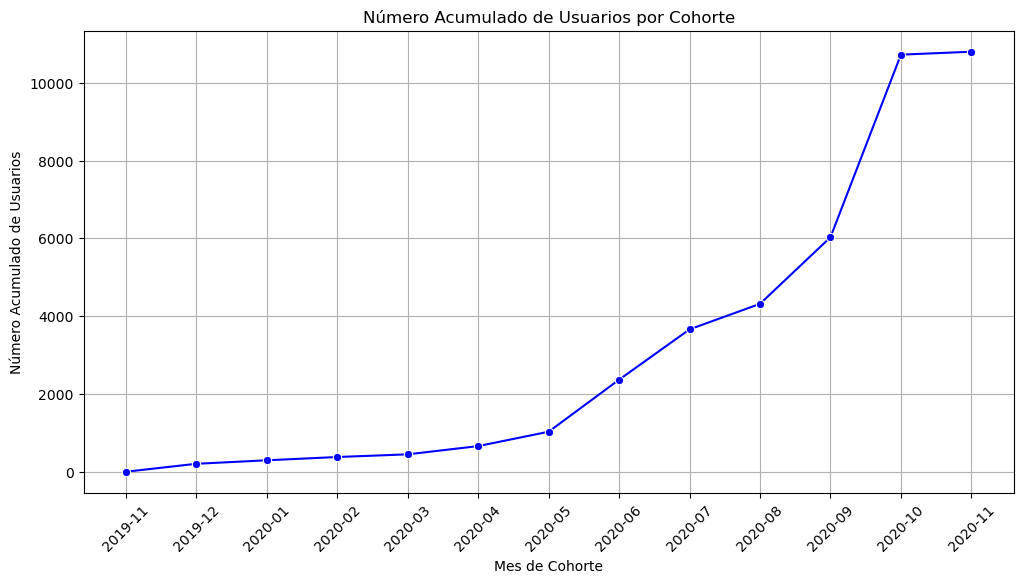

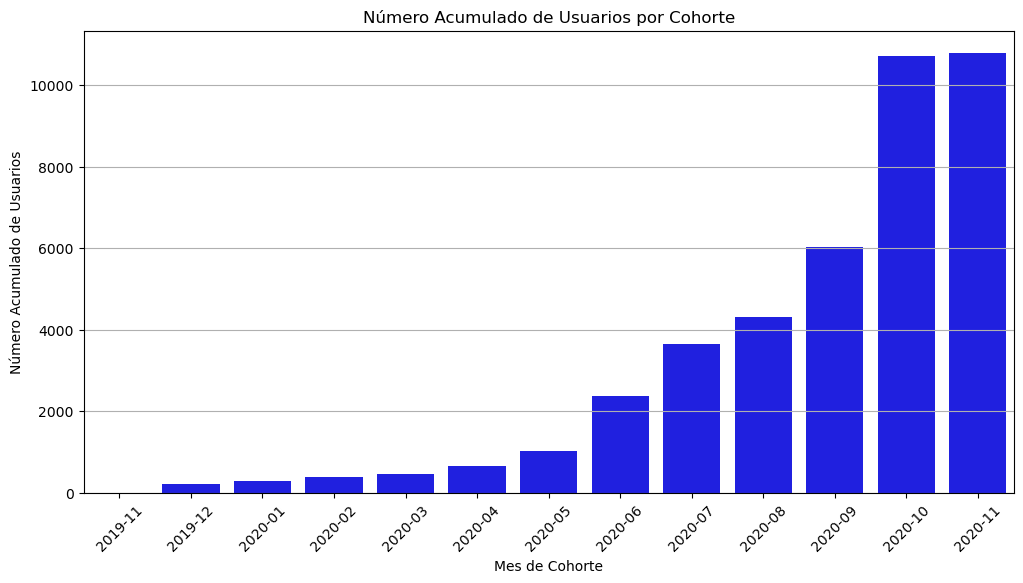

In [10]:
# Contar el número de usuarios únicos por cohorte (mes de primera operación)
cohort_counts = first_operation.groupby('first_operation_month')['user_id'].nunique().reset_index()
cohort_counts.columns = ['cohort_month', 'new_users']

# Calcular el número acumulado de usuarios por cohorte
cohort_counts['cumulative_users'] = cohort_counts['new_users'].cumsum()

# Convertir la columna 'cohort_month' a un formato datetime adecuado para graficar
cohort_counts['cohort_month'] = cohort_counts['cohort_month'].astype(str)

# el número de usuarios únicos
total_users = payments['user_id'].nunique()

print(f"El número total de usuarios es: {total_users}")


# Graficar el número acumulado de usuarios por cohorte
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_counts, x='cohort_month', y='cumulative_users', marker='o', color='b')
plt.title('Número Acumulado de Usuarios por Cohorte')
plt.xlabel('Mes de Cohorte')
plt.ylabel('Número Acumulado de Usuarios')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Graficar el número acumulado de usuarios por cohorte usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_counts, x='cohort_month', y='cumulative_users', color='b')
plt.title('Número Acumulado de Usuarios por Cohorte')
plt.xlabel('Mes de Cohorte')
plt.ylabel('Número Acumulado de Usuarios')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


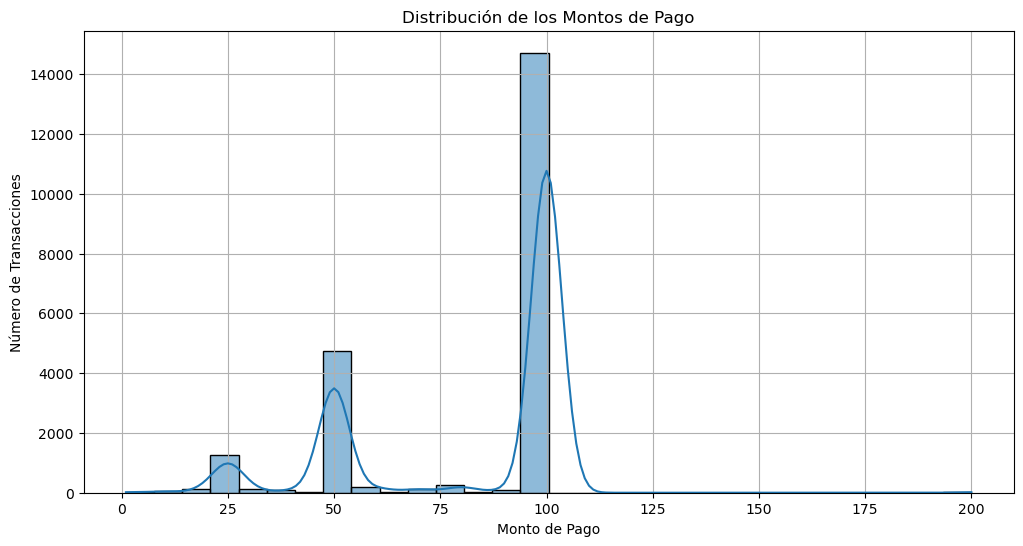

In [12]:
#cantidad media solicitada
plt.figure(figsize=(12, 6))
sns.histplot(payments['amount'], bins=30, kde=True)
plt.title('Distribución de los Montos de Pago')
plt.xlabel('Monto de Pago')
plt.ylabel('Número de Transacciones')
plt.grid(True)
plt.show()

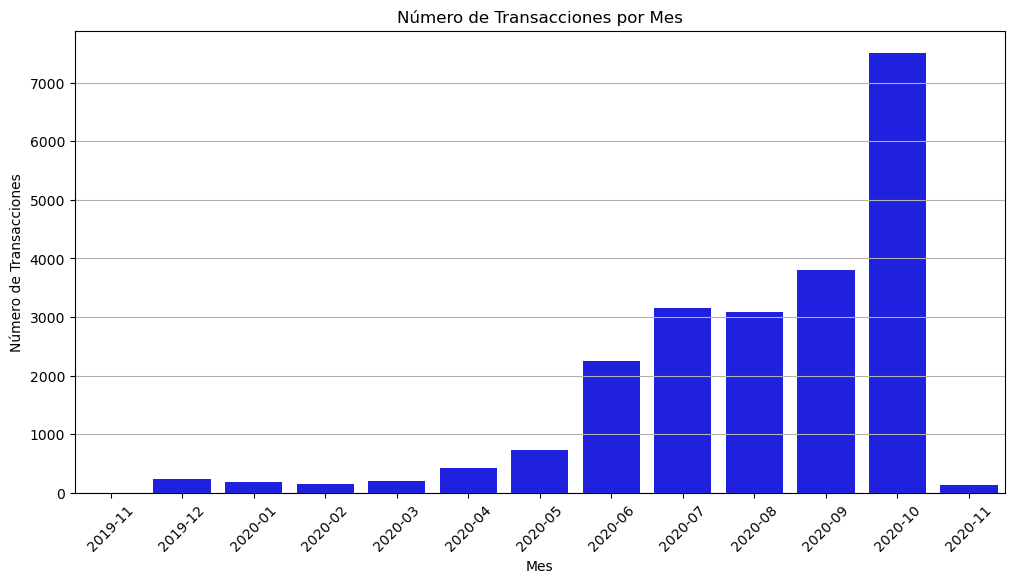

In [11]:
# Contar el número de transacciones por mes
transactions_per_month = payments.groupby('year_month')['id'].count().reset_index()
transactions_per_month.columns = ['month', 'transaction_count']

# Convertir la columna 'month' a un formato string adecuado para graficar
transactions_per_month['month'] = transactions_per_month['month'].astype(str)

# Graficar el número de transacciones por mes
plt.figure(figsize=(12, 6))
sns.barplot(data=transactions_per_month, x='month', y='transaction_count', color='b')
plt.title('Número de Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [ ]:


# Contar el número de operaciones por usuario por cohorte mensual
# es decir la frecuencia o historial de uso por user_id 
usage_frequency = payments.groupby(['first_operation_month', 'user_id']).size().reset_index(name='usage_count')

# Calcular la frecuencia media de uso por cohorte mensual
# es decir, cuantas veces de media utilizan el servicio los usuarios de los cohortes definidos 
cohort_usage_frequency = usage_frequency.groupby('first_operation_month')['usage_count'].mean().reset_index()
cohort_usage_frequency.columns = ['cohort_month', 'avg_usage_frequency']

cohort_usage_frequency.head()



,cohort_month,avg_usage_frequency
0,2019-11,8.000000
1,2019-12,4.377451
2,2020-01,3.566667
3,2020-02,5.035714
4,2020-03,4.681159


In [ ]:
# Convertir la columna 'type' en una columna binaria 'incident' en el DataFrame 'fees'
# Dentro de category encontramos el tipo de incidencia, pero debomos enfocar las incidencias totales quee estarían en type como incident 
#para facilitar operacion nueva columna binaria y obtendremos de esta manera la media de incidentes por cohorte 
fees['incident'] = fees['type'].apply(lambda x: 1 if x == 'incident' else 0)
fees.head()

# Calcular la tasa de incidentes por cohorte en el DataFrame 'fees'
incident_rate = fees.groupby('first_operation_month')['incident'].mean().reset_index()
incident_rate.columns = ['cohort_month', 'incident_rate']

incident_rate




,cohort_month,incident_rate
0,2019-11,0.000000
1,2019-12,0.143345
2,2020-01,0.153285
3,2020-02,0.124352
4,2020-03,0.180124
5,2020-04,0.238901
6,2020-05,0.193182
7,2020-06,0.168439
8,2020-07,0.165547
9,2020-08,0.103571


In [ ]:
# Calcular los ingresos totales por cohorte mensual
cohort_revenue = fees.groupby('first_operation_month')['total_amount'].sum().reset_index()
cohort_revenue.columns = ['cohort_month', 'total_revenue']

print(cohort_revenue)

   cohort_month  total_revenue
0       2019-11           50.0
1       2019-12         1465.0
2       2020-01          685.0
3       2020-02          965.0
4       2020-03          805.0
5       2020-04         2365.0
6       2020-05         5280.0
7       2020-06        20690.0
8       2020-07        16370.0
9       2020-08         7000.0
10      2020-09        15755.0
11      2020-10        28990.0
12      2020-11          335.0


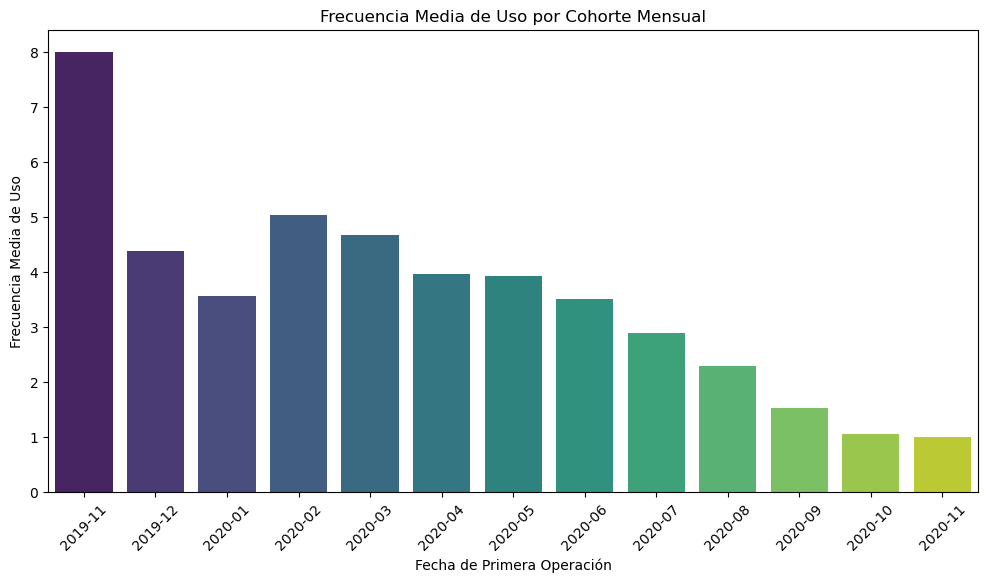

In [ ]:
# Gráfico de barras para la frecuencia de uso
# Confirmada, interpretación correcta, los usuarios delprimer cohorte, usan el servicio con una frecuencia media de 8 veces por usuario
plt.figure(figsize=(12, 6))
sns.barplot(x='cohort_month', y='avg_usage_frequency', data=cohort_usage_frequency, palette='viridis')
plt.title('Frecuencia Media de Uso por Cohorte Mensual')
plt.xlabel('Fecha de Primera Operación')
plt.ylabel('Frecuencia Media de Uso')
plt.xticks(rotation=45)
plt.show()



## los usuarios del primer cohorte , son quienes realizan o tienen mayor frecuencia de uso promedio del servicio de irion payments , y tiene sentido, porque son quienes mas tiempo llevan registrados en la aplicacion 

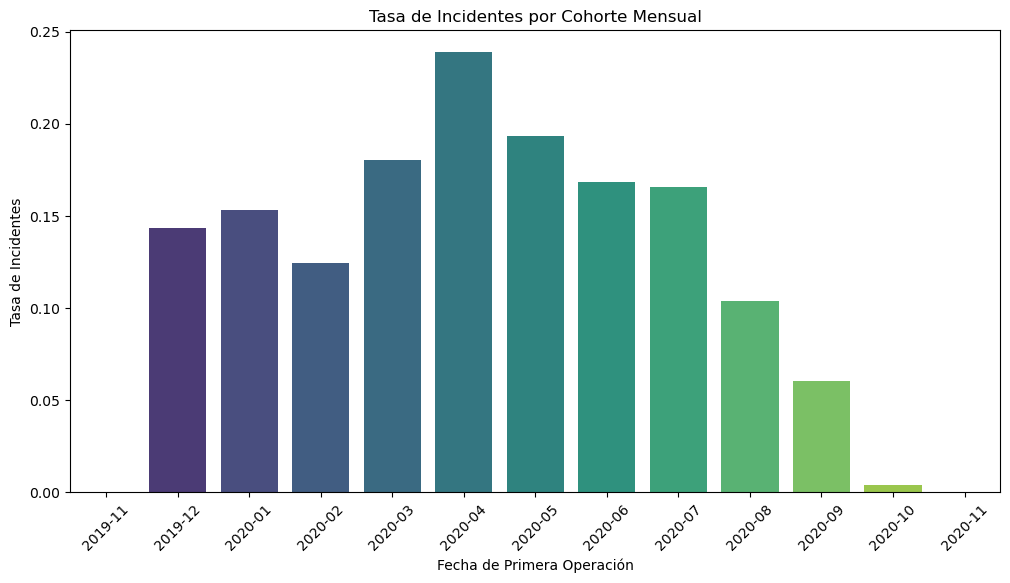

In [ ]:
# Gráfico de barras para la tasa de incidentes
plt.figure(figsize=(12, 6))
sns.barplot(x='cohort_month', y='incident_rate', data=incident_rate, palette='viridis')
plt.title('Tasa de Incidentes por Cohorte Mensual')
plt.xlabel('Fecha de Primera Operación')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.show()



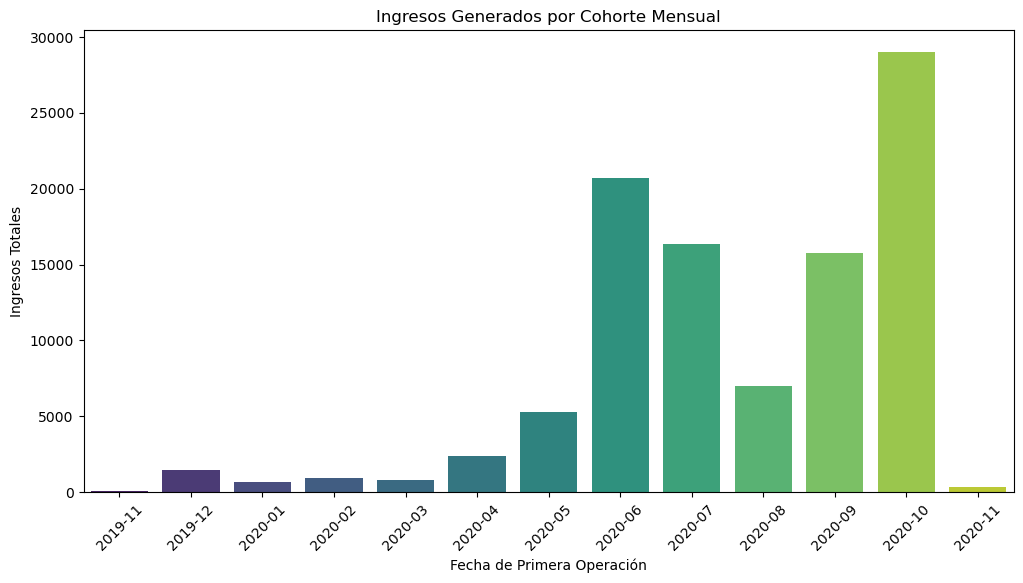

In [ ]:
# Gráfico de barras para los ingresos generados
plt.figure(figsize=(12, 6))
sns.barplot(x='cohort_month', y='total_revenue', data=cohort_revenue, palette='viridis')
plt.title('Ingresos Generados por Cohorte Mensual')
plt.xlabel('Fecha de Primera Operación')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()



In [15]:
# Nueva metrica, tasa de uso global 

# Contamos el número total de usuarios únicos
total_unique_users = payments['user_id'].nunique()

# Contar el número total de transacciones
total_transactions = payments.shape[0]

# Calcular la tasa de uso global
# Aquí asumimos que la tasa de uso global se basa en la frecuencia de uso
# Si cada usuario es considerado como un uso activo entonces la tasa es simplemente 1.0 (100%)
# Vamos a calcular la media de transacciones por usuario
transactions_per_user = total_transactions / total_unique_users

print(f"El número total de usuarios únicos es: {total_unique_users}")
print(f"El número total de transacciones es: {total_transactions}")
print(f"La tasa de uso global es: {transactions_per_user:.2f} transacciones por usuario")

#o la cantidad ingresos por usuario, o rendimiento por usuario 
# Calcular el monto total de todas las transacciones
total_amount = payments['amount'].sum()

# Calcular el ingreso promedio por usuario
average_income_per_user = total_amount / total_unique_users
print(f"El número total de usuarios únicos es: {total_unique_users}")
print(f"El monto total de todas las transacciones es: {total_amount}")
print(f"El ingreso promedio por usuario es: {average_income_per_user:.2f}")

El número total de usuarios únicos es: 10798
El número total de transacciones es: 21867
La tasa de uso global es: 2.03 transacciones por usuario
El número total de usuarios únicos es: 10798
El monto total de todas las transacciones es: 1807116.0
El ingreso promedio por usuario es: 167.36
